In [ ]:
!pip install lazypredict

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgbm
from sklearn.ensemble import BaggingRegressor as BR
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV as GSCV
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_absolute_error, max_error, median_absolute_error, explained_variance_score
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor as DTR
import matplotlib.pyplot as plt 
from PIL import Image as im
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import r2_score as r2
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from IPython.display import Image
import datetime
from datetime import date
import calendar
from sklearn.metrics import accuracy_score as acc

In [ ]:
df=pd.read_csv('drive/MyDrive/Lab Data Sets/bonus/Dataset.csv', header= 0, encoding= 'unicode_escape')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Pre Processing**

In [ ]:
df.dropna(axis=0)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
df['Date_of_Journey']=df['Date_of_Journey'].str.split('/')

In [ ]:
df['Date']=df['Date_of_Journey'].str[0].astype('int64')
df['Month']=df['Date_of_Journey'].str[1].astype('int64')
df['Year']=df['Date_of_Journey'].str[2].astype('int64')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


Encoding Duration

In [ ]:
df['Duration']=df['Duration'].str.split(' ')

In [ ]:
h=df['Duration'].str[0].str[:-1].astype('int64')*60
m=df['Duration'].str[1].str[:-1].fillna('0').astype('int64')
# print(m)
df['Duration']=h+m
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2 stops,No info,7662,1,5,2019
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,2019
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1 stop,No info,6218,12,5,2019
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1 stop,No info,13302,1,3,2019


Encoding No. of Stops

In [ ]:
df['Total_Stops'].replace('non-stop','0',inplace=True)
label=LabelEncoder()
df['Total_Stops'] = label.fit_transform(df['Total_Stops'].astype(str))
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,0,No info,3897,24,3,2019
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2,No info,7662,1,5,2019
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2,No info,13882,9,6,2019
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1,No info,6218,12,5,2019
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1,No info,13302,1,3,2019


Encoding Day

In [ ]:
def findDay(date,month,year): 
    born = datetime.date(year, month, date)
    return born.strftime("%A")
days=[]
for i in range(len(df)):
  days.append(findDay(df['Date'][i],df['Month'][i],df['Year'][i]))
df['Day']=days
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,0,No info,3897,24,3,2019,Sunday
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2,No info,7662,1,5,2019,Wednesday
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2,No info,13882,9,6,2019,Sunday
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1,No info,6218,12,5,2019,Sunday
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1,No info,13302,1,3,2019,Friday


In [ ]:
df['Day'].unique()

array(['Sunday', 'Wednesday', 'Friday', 'Monday', 'Tuesday', 'Saturday',
       'Thursday'], dtype=object)

Additional Info

In [ ]:
df['Additional_Info']=df['Additional_Info'].replace('No Info','No info')

Encoding Departure time

In [ ]:
df['Dep_Time']=df['Dep_Time'].str.split(':')
h1=df['Dep_Time'].str[0].astype('int64')
m1=df['Dep_Time'].str[1].fillna('0').astype('int64')
df['Dep_Houre']=h1
df['Dep_Min']=m1
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day,Dep_Houre,Dep_Min
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR ? DEL,"[22, 20]",01:10 22 Mar,170,0,No info,3897,24,3,2019,Sunday,22,20
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,"[05, 50]",13:15,445,2,No info,7662,1,5,2019,Wednesday,5,50
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL ? LKO ? BOM ? COK,"[09, 25]",04:25 10 Jun,1140,2,No info,13882,9,6,2019,Sunday,9,25
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU ? NAG ? BLR,"[18, 05]",23:30,325,1,No info,6218,12,5,2019,Sunday,18,5
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR ? NAG ? DEL,"[16, 50]",21:35,285,1,No info,13302,1,3,2019,Friday,16,50


In [ ]:
df['Arrival_Time']=df['Arrival_Time'].str.split(':')
h1=df['Arrival_Time'].str[0].astype('int64')
m1=df['Arrival_Time'].str[1].str.split(' ').str[0].fillna('0').astype('int64')
df['Arrival_Hour']=h1
df['Arrival_Min']=m1
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day,Dep_Houre,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR ? DEL,"[22, 20]","[01, 10 22 Mar]",170,0,No info,3897,24,3,2019,Sunday,22,20,1,10
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,"[05, 50]","[13, 15]",445,2,No info,7662,1,5,2019,Wednesday,5,50,13,15
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL ? LKO ? BOM ? COK,"[09, 25]","[04, 25 10 Jun]",1140,2,No info,13882,9,6,2019,Sunday,9,25,4,25
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU ? NAG ? BLR,"[18, 05]","[23, 30]",325,1,No info,6218,12,5,2019,Sunday,18,5,23,30
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR ? NAG ? DEL,"[16, 50]","[21, 35]",285,1,No info,13302,1,3,2019,Friday,16,50,21,35


Stops Encoding

In [ ]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 5, 4])

In [ ]:
print(df['Source'].unique())
print(df['Destination'].unique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


Visualization

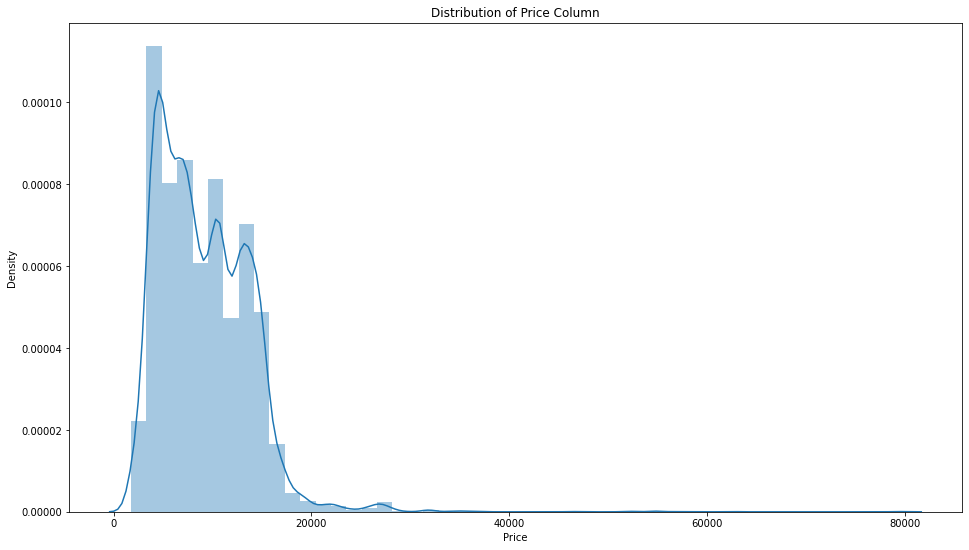

In [ ]:
plt.figure(figsize=(16,9))
sns.distplot(df['Price'])
plt.title('Distribution of Price Column')
plt.show()

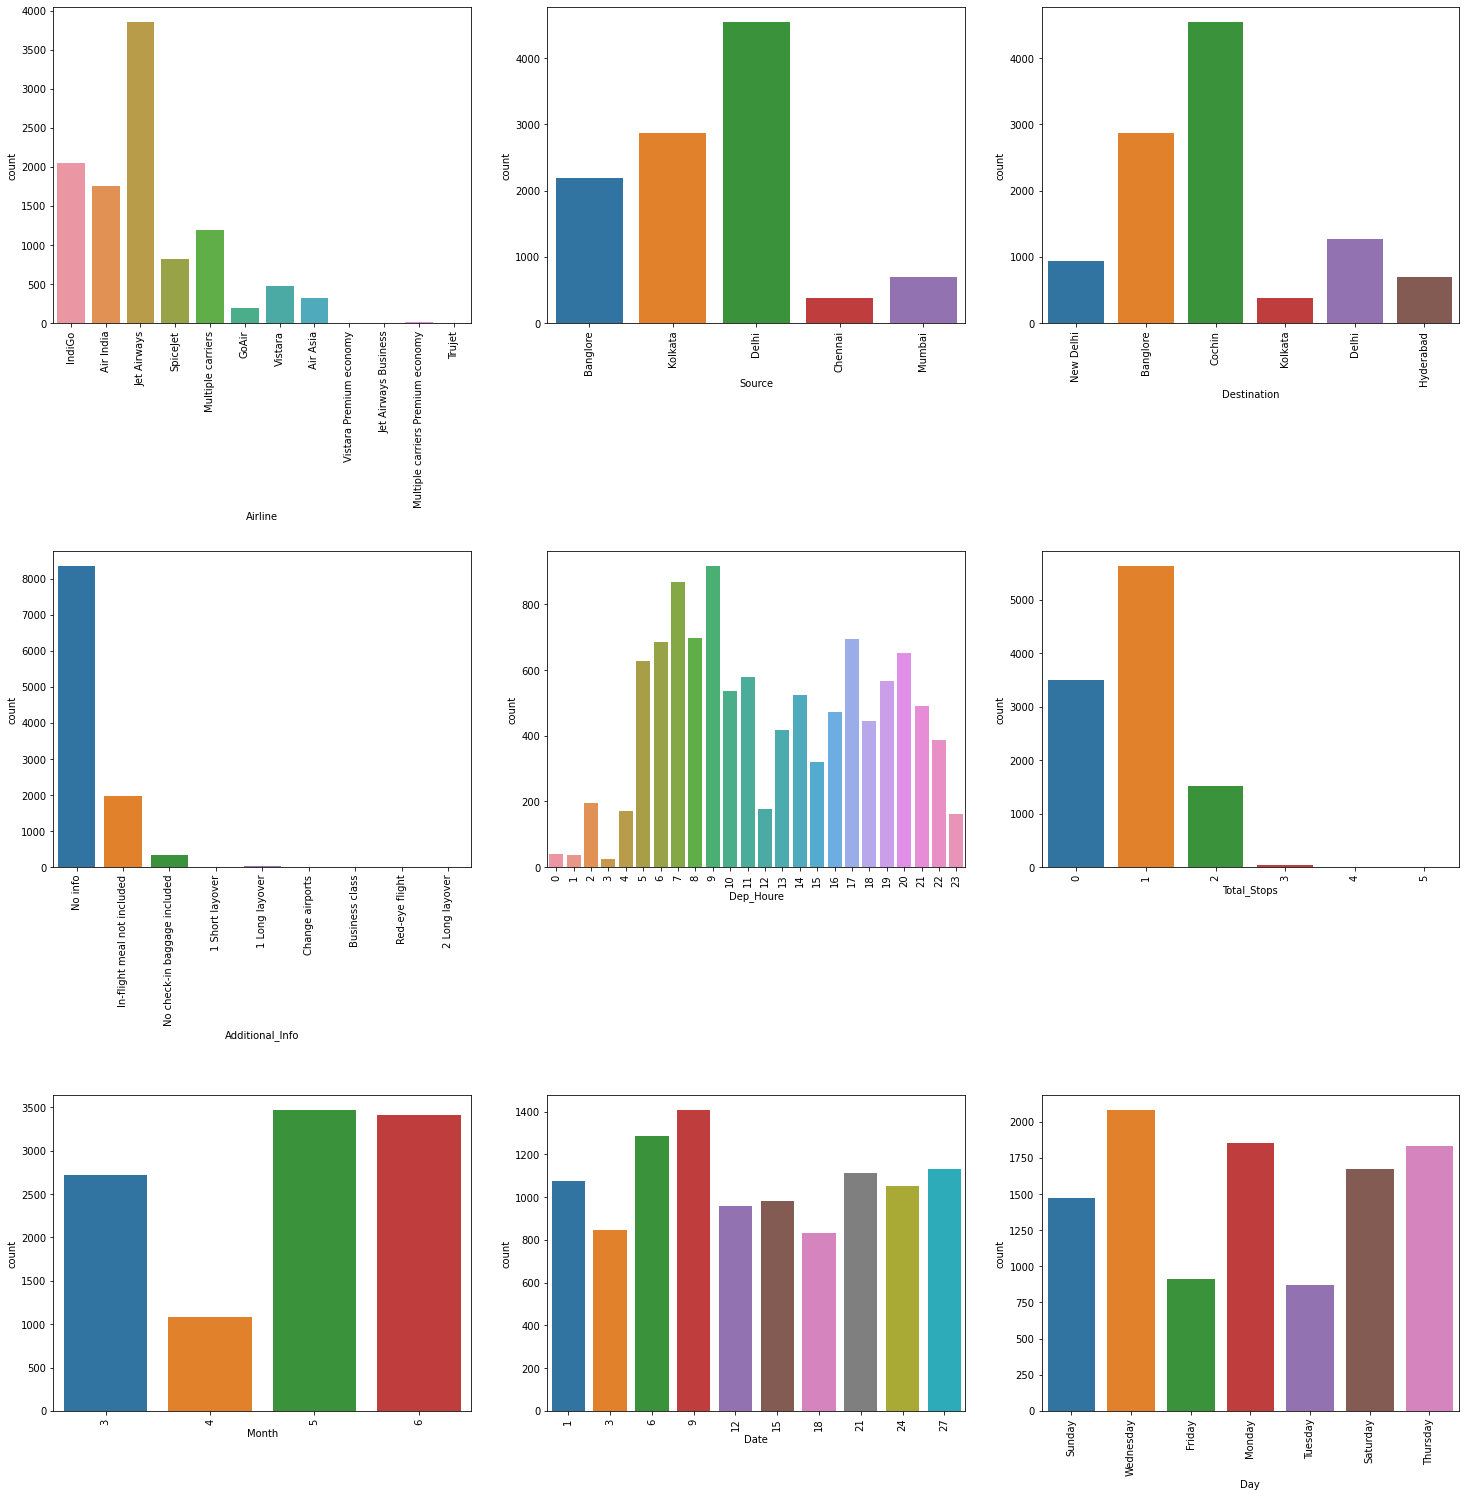

In [ ]:
count_plots=['Airline','Source','Destination','Additional_Info','Dep_Houre','Total_Stops','Month','Date','Day']
plt.figure(figsize=(21,43))
c=1
for i in count_plots:
  plt.subplot(6,3,c)
  sns.countplot(x=df[i])
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3)
  c+=1

plt.show()

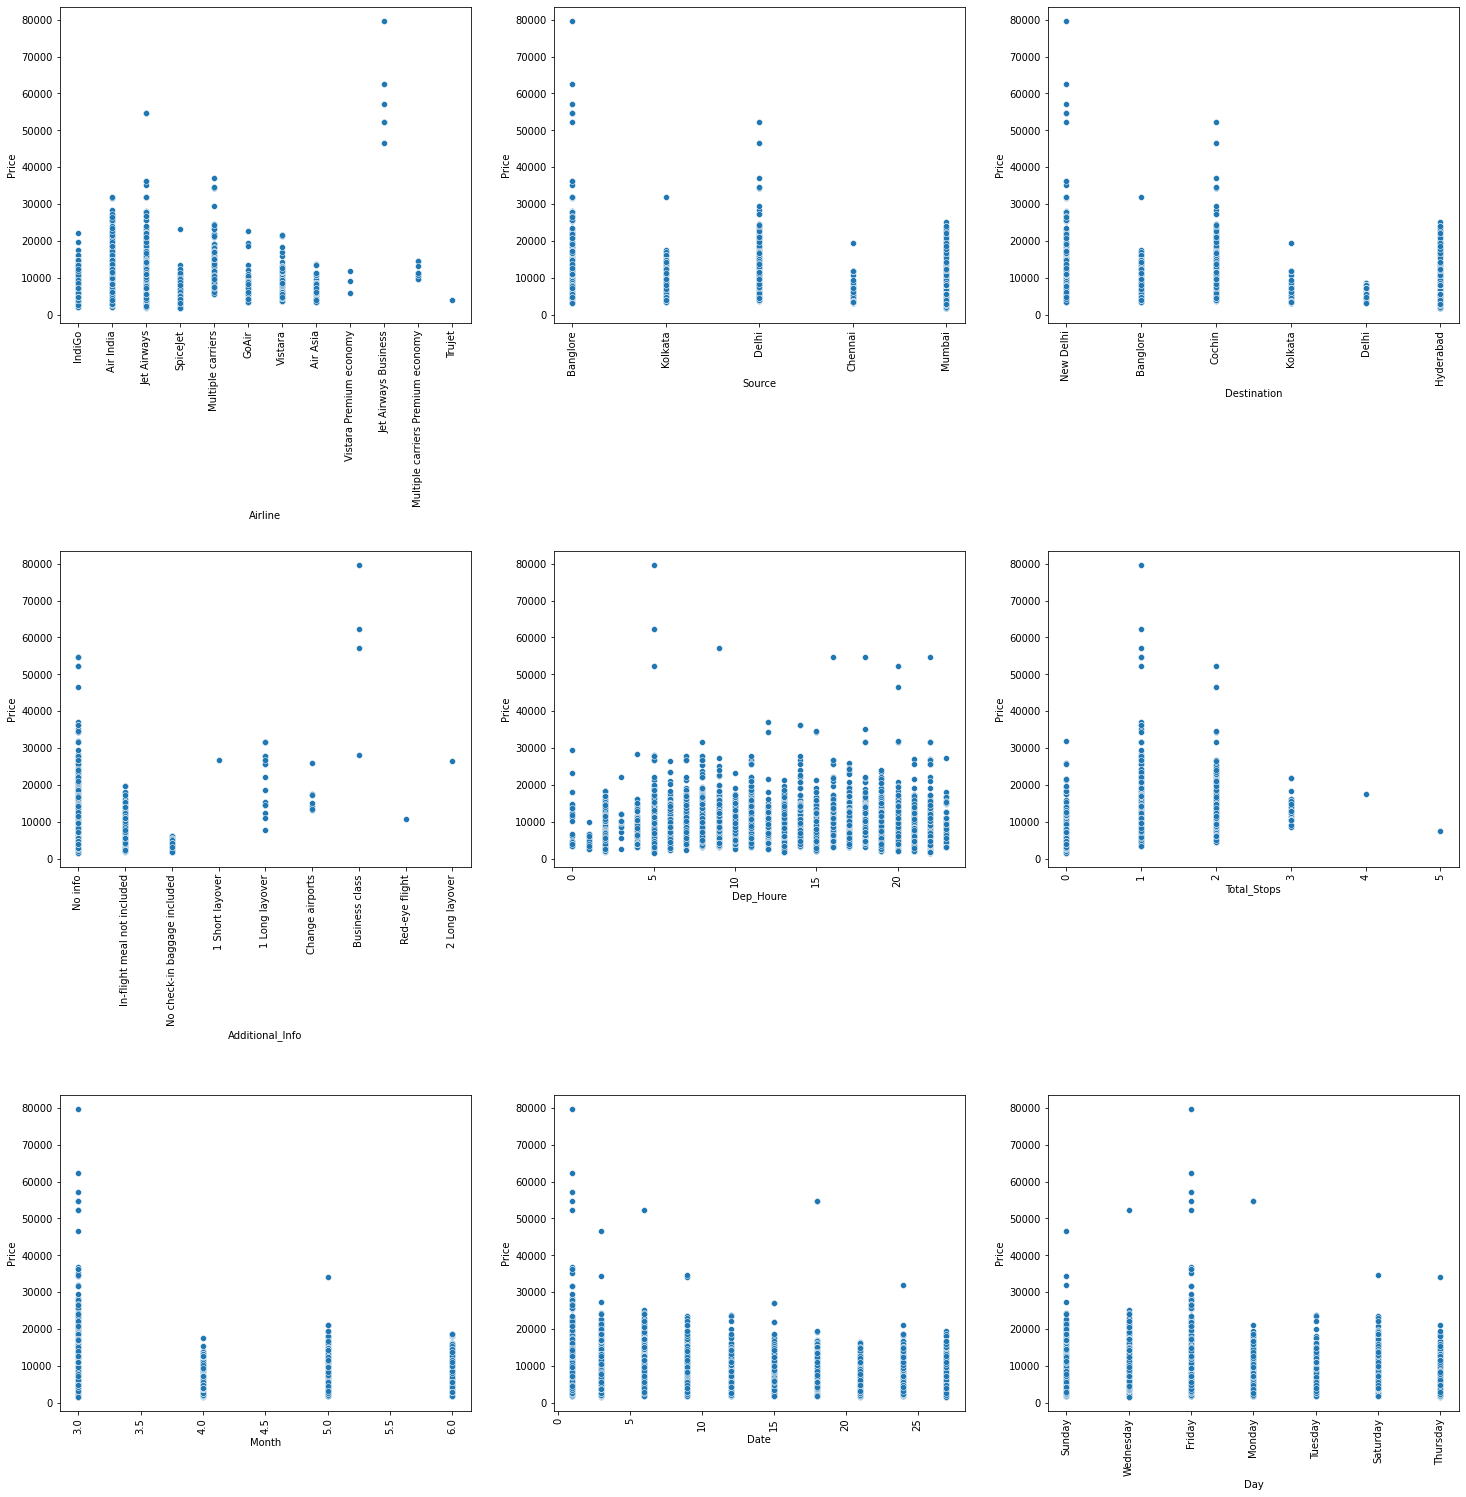

In [ ]:
plt.figure(figsize=(21,43))
c=1
for i in count_plots:
  plt.subplot(6,3,c)
  sns.scatterplot(x=df[i],y=df['Price'])
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3)
  c+=1
plt.show()

Dropping Columns

In [ ]:
df.drop(['Year','Arrival_Time','Date_of_Journey','Dep_Time'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Day,Dep_Houre,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,0,No info,3897,24,3,Sunday,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2,No info,7662,1,5,Wednesday,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,1140,2,No info,13882,9,6,Sunday,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,325,1,No info,6218,12,5,Sunday,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,285,1,No info,13302,1,3,Friday,16,50,21,35


Label Encoding

In [ ]:
df['Day']=df['Day'].replace({'Sunday':7, 'Wednesday':3, 'Friday':5, 'Monday':1, 'Tuesday':2, 'Saturday':6, 'Thursday':4})
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Day,Dep_Houre,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,0,No info,3897,24,3,7,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2,No info,7662,1,5,3,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,1140,2,No info,13882,9,6,7,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,325,1,No info,6218,12,5,7,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,285,1,No info,13302,1,3,5,16,50,21,35


In [ ]:
encoded=['Airline','Source','Destination','Additional_Info','Route']
label=LabelEncoder()
for i in encoded:
  df[i]=label.fit_transform(df[i].astype(str))
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Day,Dep_Houre,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,18,170,0,7,3897,24,3,7,22,20,1,10
1,1,3,0,84,445,2,7,7662,1,5,3,5,50,13,15
2,4,2,1,118,1140,2,7,13882,9,6,7,9,25,4,25
3,3,3,0,91,325,1,7,6218,12,5,7,18,5,23,30
4,3,0,5,29,285,1,7,13302,1,3,5,16,50,21,35


Model Training

In [ ]:
X,y=df.drop(['Price'],axis=1),df['Price']
X_train,X_test,y_train,y_test=tts(X,y,train_size=0.8)

In [ ]:
X_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Date,Month,Day,Dep_Houre,Dep_Min,Arrival_Hour,Arrival_Min
563,4,2,1,106,195,0,5,18,4,4,11,0,14,15
3426,8,2,1,103,375,1,7,3,3,7,16,35,22,50
3929,3,3,0,80,315,1,7,6,6,4,15,15,20,30
4032,8,3,0,64,145,0,6,9,6,7,9,0,11,25
8046,4,3,0,66,330,1,7,21,5,2,6,30,12,0


In [ ]:
X_train['Additional_Info'].value_counts()

7    6659
5    1591
6     269
0      15
4       6
3       3
2       1
1       1
8       1
Name: Additional_Info, dtype: int64

Regression Report

In [ ]:
def regression_report(y_true, y_pred):
    
    error = y_true - y_pred
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)
    
    metrics = [
        ('Mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('Median absolute error', median_absolute_error(y_true, y_pred)),
        ('Mean squared error', MSE(y_true, y_pred)),
        ('Max error', max_error(y_true, y_pred)),
        ('R2 score', r2(y_true, y_pred)),
        ('Explained variance score', explained_variance_score(y_true, y_pred))
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')

Lazy Regressor

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [01:11<00:00,  1.71s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.92,0.92,1364.50,2.41
XGBRegressor,0.91,0.91,1435.00,0.82
BaggingRegressor,0.89,0.89,1571.72,0.50
RandomForestRegressor,0.88,0.88,1627.52,3.00
HistGradientBoostingRegressor,0.87,0.87,1715.64,0.60
LGBMRegressor,0.87,0.87,1730.58,0.21
GradientBoostingRegressor,0.82,0.82,2007.23,1.03
ExtraTreeRegressor,0.81,0.81,2063.13,0.05
DecisionTreeRegressor,0.80,0.80,2152.29,0.15


Model Training and Cross Validation

Random Forest Regressor

In [ ]:
reg=RFR()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print(r2(y_test,y_pred))
print(MSE(y_test,y_pred))

0.876137524922116
2845010.3734839326


In [ ]:
reg_cv=RFR()
score=cross_val_score(reg_cv,X,y,cv=5)
score.mean()

0.8852999827130086

In [ ]:
regression_report(y_test,y_pred)

Metrics for regression:
      Mean absolute error:              648.322
    Median absolute error:              241.200
       Mean squared error:          2845010.373
                Max error:            34814.710
                 R2 score:                0.876
 Explained variance score:                0.876


Parameter Tuning

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,100,500],
    'n_estimators': [100, 500, 1000,1500]
}
rfr_g=RFR()
rfr_grid = GSCV(rfr_g, param_grid,cv = 4)
rfr_grid.fit(X,y)
rfr_grid.best_params_

{'bootstrap': True, 'max_depth': 100, 'n_estimators': 500}

In [ ]:
selected_params_rfr=rfr_grid.best_params_
print(selected_params_rfr)
# print(rfr_grid.score_)

{'bootstrap': True, 'max_depth': 100, 'n_estimators': 500}


In [ ]:
print(rfr_grid.best_score_)

0.8800041485316487


Decision Tree Regressor

In [ ]:
reg1=DTR()
reg1.fit(X_train,y_train)
y_pred1=reg1.predict(X_test)
print(r2(y_test,y_pred1))
print(MSE(y_test,y_pred1))

0.8098787944881527
4366914.205132455


In [ ]:
reg_cv1=DTR()
score1=cross_val_score(reg_cv1,X,y,cv=5)
score1.mean()

0.7947350002062046

In [ ]:
regression_report(y_test,y_pred1)

Metrics for regression:
      Mean absolute error:              735.418
    Median absolute error:                0.000
       Mean squared error:          4366914.205
                Max error:            34330.000
                 R2 score:                0.810
 Explained variance score:                0.810


Gradient Boost Regressor

In [ ]:
reg2=GradientBoostingRegressor()
reg2.fit(X_train,y_train)
y_pred2=reg2.predict(X_test)
print(r2(y_test,y_pred2))
print(MSE(y_test,y_pred2))

0.8271822569232956
3969469.134749221


In [ ]:
reg_cv2=GradientBoostingRegressor()
score2=cross_val_score(reg_cv2,X,y,cv=5)
score2.mean()

0.826707427879116

In [ ]:
regression_report(y_test,y_pred2)

Metrics for regression:
      Mean absolute error:             1262.582
    Median absolute error:              857.044
       Mean squared error:          3969469.135
                Max error:            26591.312
                 R2 score:                0.827
 Explained variance score:                0.827


XG Boost Regressor

In [ ]:
reg3=xgb.XGBRegressor(random_state=0,subsample=0.8,max_depth=6)
reg3.fit(X_train,y_train)
y_pred3=reg3.predict(X_test)
print(r2(y_test,y_pred3))
print(MSE(y_test,y_pred3))

0.9141241212337892
1972492.1996617042


In [ ]:
reg_cv3=xgb.XGBRegressor(random_state=0,subsample=0.7,max_depth=4)
score3=cross_val_score(reg_cv3,X,y,cv=5)
score3.mean()

0.8839095907418972

In [ ]:
regression_report(y_test,y_pred3)

Metrics for regression:
      Mean absolute error:              744.370
    Median absolute error:              422.871
       Mean squared error:          1972492.200
                Max error:            26532.863
                 R2 score:                0.914
 Explained variance score:                0.914


Hyper Parameter Tuning

In [ ]:
parameters = {'learning_rate':[0.01,0.1,1], 'max_depth':[6, 8, 10]}
xgb_grid = xgb.XGBRegressor()
reg_grid = GSCV(xgb_grid, parameters)
reg_grid.fit(X,y)
reg_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 10}

In [ ]:
selected_params=reg_grid.best_params_
print(selected_params)

{'learning_rate': 0.1, 'max_depth': 10}


In [ ]:
reg_grid.cv_results_

{'mean_fit_time': array([1.7029911 , 1.01288071, 1.30394974, 0.70893636, 0.99563818,
        1.28679533, 0.72859917, 1.01986251, 1.39296179]),
 'mean_score_time': array([0.01981978, 0.01337805, 0.01507015, 0.0140543 , 0.01579304,
        0.01931481, 0.01316929, 0.01758299, 0.02204018]),
 'mean_test_score': array([0.11227973, 0.15092997, 0.1695948 , 0.88364516, 0.88208075,
        0.89161265, 0.86111999, 0.81853252, 0.8341922 ]),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[6, 8, 10, 6, 8, 10, 6, 8, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.01, 'max_depth': 6},
  {'learning_rate': 0.01, 'max_depth': 8},
  {

Sequential Backward Selection

In [ ]:
xgbr = xgb.XGBRegressor(learning_rate=0.1,max_depth=10)
sbs = SFS(xgbr, k_features=10, forward=False,floating=False,cv=4)
sbs.fit(X.values, y.values)
print('Sequential Backward Selection:')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)

Sequential Backward Selection:
(0, 2, 3, 5, 6, 7, 8, 10, 11, 12)
CV Score:
0.8829091941274723


In [ ]:
sbs.subsets_

{10: {'avg_score': 0.8829091941274723,
  'cv_scores': array([0.85508695, 0.92417755, 0.86052722, 0.89184506]),
  'feature_idx': (0, 2, 3, 5, 6, 7, 8, 10, 11, 12),
  'feature_names': ('0', '2', '3', '5', '6', '7', '8', '10', '11', '12')},
 11: {'avg_score': 0.8845012616733762,
  'cv_scores': array([0.85935945, 0.92398582, 0.86152146, 0.89313831]),
  'feature_idx': (0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12),
  'feature_names': ('0', '1', '2', '3', '5', '6', '7', '8', '10', '11', '12')},
 12: {'avg_score': 0.886171227532411,
  'cv_scores': array([0.86298574, 0.92830153, 0.86657534, 0.88682231]),
  'feature_idx': (0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13),
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '5',
   '6',
   '7',
   '8',
   '10',
   '11',
   '12',
   '13')},
 13: {'avg_score': 0.8871388355302003,
  'cv_scores': array([0.86581257, 0.92816614, 0.86563011, 0.88894653]),
  'feature_idx': (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13),
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '5'

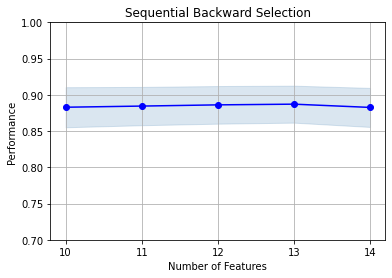

In [ ]:
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

plt.ylim([0.7, 1])
plt.title('Sequential Backward Selection')
plt.grid()
plt.show()

In [ ]:
scores=[]
for i in sbs.get_metric_dict():
  scores.append(sbs.get_metric_dict()[i]['avg_score'])

np.argmax(scores)

1

In [ ]:
sbs.k_feature_names_

('0', '2', '3', '5', '6', '7', '8', '10', '11', '12')

In [ ]:
xgbr1 = xgb.XGBRegressor(learning_rate=0.1,max_depth=10)
sbs1 = SFS(xgbr, k_features=13, forward=False,floating=False,cv=4)
sbs1.fit(X.values, y.values)
print('Sequential Backward Selection:')
print(sbs1.k_feature_idx_)
print('CV Score:')
print(sbs1.k_score_)

Sequential Backward Selection:
(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13)
CV Score:
0.8871388355302003


In [ ]:
feature_indexes=list(sbs1.k_feature_idx_)
feature_indexes

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [ ]:
X_new=X.drop(['Duration'],axis=1)
X_new.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Day,Dep_Houre,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,18,0,7,24,3,7,22,20,1,10
1,1,3,0,84,2,7,1,5,3,5,50,13,15
2,4,2,1,118,2,7,9,6,7,9,25,4,25
3,3,3,0,91,1,7,12,5,7,18,5,23,30
4,3,0,5,29,1,7,1,3,5,16,50,21,35


In [ ]:
X_train_new=X_train.drop(['Duration'],axis=1)
X_test_new=X_test.drop(['Duration'],axis=1)

Model Building

XG Boost

In [ ]:
model = xgb.XGBRegressor(learning_rate=0.1,max_depth=10)
model.fit(X_train_new,y_train)
y_pred_new=model.predict(X_test_new)

In [ ]:
regression_report(y_test,y_pred_new)

Metrics for regression:
      Mean absolute error:              623.535
    Median absolute error:              268.709
       Mean squared error:          1521077.769
                Max error:            14472.250
                 R2 score:                0.925
 Explained variance score:                0.925


Random Forest

In [ ]:
model1 = RFR(bootstrap= True, max_depth= 100, n_estimators= 500)
model1.fit(X_train_new,y_train)
y_pred_new1=model1.predict(X_test_new)

In [ ]:
regression_report(y_test,y_pred_new1)

Metrics for regression:
      Mean absolute error:              609.683
    Median absolute error:              222.248
       Mean squared error:          1750484.715
                Max error:            19735.316
                 R2 score:                0.914
 Explained variance score:                0.914
